# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БФИ2001 Щеголькова Дарья
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [187]:
#чтение матрицы из файла
import math
import time
import pandas as pd

def read_matrix(filename):
    f = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in f:
        node = line.split()
        temp = []
        for el in node:
            if el == 'i':
                temp.append(math.inf)
            else: 
                temp.append(int(el))
        matrix.append(temp)
    f.close()
    return matrix

g = read_matrix("mtrx.txt")
gr = tuple(g)
print(g)

[[0, 9, inf, 5, inf], [inf, 0, 1, 2, inf], [inf, inf, 0, inf, 1], [inf, 3, 5, 0, 2], [7, inf, 6, inf, 0]]


In [188]:
source = int(input("Введите начальную вершину: "))
target = int(input("Введите конечную вершину: "))

Введите начальную вершину: 0
Введите конечную вершину: 2


In [189]:
#алгоритм флойда-уоршелла
def floyd_warshall(g, u, v):
    N = len(g) #число вершин в графе
    P = [[v for v in range(N)] for u in range(N)] #начальный список предыдущих вершин для поиска кратчайших маршрутов

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = g[i][k] + g[k][j]
                if g[i][j] > d:
                    g[i][j] = d
                    P[i][j] = g[i][j] #кратчайшее расстояние при движении от i к j
    return P[u][v]

start_time = time.time()

ans = floyd_warshall(g, source, target)
print("Кратчайшее расстояние = ", ans)

print("--- %s ms ---" % ((time.time() - start_time)*1000))

table = [["4", "0.573"],
        ["5", "0.909"]]
pd.DataFrame(table, columns=["Количество вершин","Время выполнения, мс"])

Кратчайшее расстояние =  9
--- 0.5140304565429688 ms ---


,Количество вершин,"Время выполнения, мс"
0,4,0.573
1,5,0.909


In [190]:
#алгоритм дейкстры
def arg_min(T, S):
    amin = -1
    m = math.inf  # максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i
    return amin

def dijkstra(v, D):
    N = len(D)  # число вершин в графе
    T = [math.inf]*N   # последняя строка таблицы

    v = 0       # стартовая вершина (нумерация с нуля)
    S = {v}     # просмотренные вершины
    T[v] = 0    # нулевой вес для стартовой вершины
    M = [0]*N   # оптимальные связи между вершинами

    while v != -1:          # цикл, пока не просмотрим все вершины
        for j, dw in enumerate(D[v]):   # перебираем все связанные вершины с вершиной v
            if j not in S:           # если вершина еще не просмотрена
                w = T[v] + dw
                if w < T[j]:
                    T[j] = w
                    M[j] = v        # связываем вершину j с вершиной v

        v = arg_min(T, S)            # выбираем следующий узел с наименьшим весом
        if v >= 0:                    # выбрана очередная вершина
            S.add(v)                 # добавляем новую вершину в рассмотрение

    # формирование оптимального маршрута:
    start = 0
    end = 2
    P = [end]
    while end != start:
        end = M[P[-1]]
        P.append(end)
    P.reverse()
    
    return T, P

start_time = time.time()

ans, m = dijkstra(source, gr)
print("Кратчайшее расстояние = ", ans[target])

print("--- %s ms ---" % ((time.time() - start_time)*1000))

table = [["4", "0.402"],
        ["5", "0.458"]]
pd.DataFrame(table, columns=["Количество вершин","Время выполнения, мс"])

Кратчайшее расстояние =  9
--- 0.40602684020996094 ms ---


,Количество вершин,"Время выполнения, мс"
0,4,0.402
1,5,0.458


In [192]:
#алгоритм беллмана-форда
def bellman_ford(g, s):
    n = len(g)
    lambdas = [math.inf]*n
    labels = []
    lambdas[s] = 0
    
    for k in range(1, n-1):
        for i in range(n):
            for j in range(n):
                labels.append(lambdas[j] + g[j][i])
            lambdas[i] = min(labels)
            labels.clear()
            
    return lambdas

start_time = time.time()

ans = bellman_ford(g, source)
print("Кратчайшее расстояние = ", ans[target])

print("--- %s ms ---" % ((time.time() - start_time)*1000))

table = [["4", "0.622"],
        ["5", "0.767"]]
pd.DataFrame(table, columns=["Количество вершин","Время выполнения, мс"])

Кратчайшее расстояние =  9
--- 0.5548000335693359 ms ---


,Количество вершин,"Время выполнения, мс"
0,4,0.622
1,5,0.767


In [194]:
#алгоритм джонсона
def johnson(g, s):
    #добавляем в граф новую вершину, пути от которой до всех других = 0
    n = len(g)
    for i in range(n):
        g[i].append(math.inf)
    gr = [0]*(n+1)
    g.append(gr)

    #ищем кратчайший путь из новой вершины ко всем другим
    g[n] = bellman_ford(g, n)

    #задаем новые значения для каждой вершины
    for i in range(n):
        for j in range(n):
            g[i][j] = g[i][j] + g[n][i] - g[n][j]

    #удаляем добавленную вершину
    for i in range(n):
        g[i].pop()
    g.pop()

    #применяем алгоритм дейкстры к новым вершинам с неотрицательными весами
    ans, m = dijkstra(source, g)
    return ans

start_time = time.time()

ans = johnson(g, source)
print("Кратчайшее расстояние = ", ans[target])

print("--- %s ms ---" % ((time.time() - start_time)*1000))

table = [["4", "0.679"],
        ["5", "0.725"]]
pd.DataFrame(table, columns=["Количество вершин","Время выполнения, мс"])

Кратчайшее расстояние =  9
--- 0.6778240203857422 ms ---


,Количество вершин,"Время выполнения, мс"
0,4,0.679
1,5,0.725


In [196]:
#алгоритм левита
from collections import deque

def levit(g, source):
    n = len(g)
    m1 = deque()
    m1.append(source)

    #текущие кратчайшие длины путей
    d = [math.inf]*n
    d[source] = 0

    p = [-1]*n
    idd = [0]*n

    while len(m1) != 0:
        v = m1.popleft()
        idd[v] = 1
        for i in range(n):
            t = i
            l = g[v][i]
            if d[t] > (d[v]+l):
                d[t] = d[v] + l
                if idd[t] == 0:
                    m1.append(t)
                elif idd[t] == 1:
                    m1.appendleft(t)
                p[t] = v
                idd[t] = 1
                
    return d

start_time = time.time()

ans = levit(g, source)
print("Кратчайшее расстояние = ", ans[target])

print("--- %s ms ---" % ((time.time() - start_time)*1000))

table = [["4", "0.579"],
        ["5", "0.721"]]
pd.DataFrame(table, columns=["Количество вершин","Время выполнения, мс"])

Кратчайшее расстояние =  9
--- 0.5879402160644531 ms ---


,Количество вершин,"Время выполнения, мс"
0,4,0.579
1,5,0.721


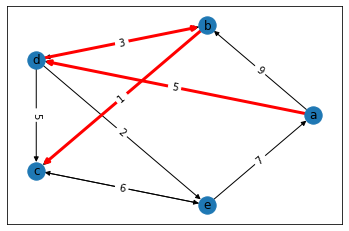

In [31]:
#визуализация графа
import networkx as nx

def print_graph(source, target):
    G = nx.DiGraph()

    G.add_weighted_edges_from([
        ('a', 'b', 9), ('a', 'd', 5), ('b', 'c', 1), ('b', 'd', 2), 
        ('c', 'e', 1), ('d', 'b', 3), ('d', 'c', 5), ('d', 'e', 2), 
        ('e', 'a', 7), ('e', 'c', 6)])

    # расчет кратчайших путей для ВСЕХ пар вершин
    predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
    # кратчайший путь от вершины [a] к вершине [c]
    shortest_path_s_t = nx.reconstruct_path(source, target, predecessors)
    # список ребер кратчайшего пути
    edges = [(a,b) for a,b in zip(shortest_path_s_t, shortest_path_s_t[1:])]
    # список всех весов ребер
    weights = nx.get_edge_attributes(G, 'weight')
    # позиции вершин для визуализации графа
    #pos = nx.spring_layout(G)
    pos = nx.circular_layout(G)
    # рисуем граф
    nx.draw_networkx(G, pos=pos)
    # рисуем веса ребер
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    # рисуем кратчайший путь
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3)

alf = []
for i in range(97,123):
    alf.append(chr(i))

s = alf[s]
t = alf[t]

print_graph(s, t)

### Вывод

В ходе работы были изучены основные алгоритмы поиска кратчайшего пути между вершинами графа, а также графическое построение графа и кратчайшего маршрута. 